### Обработка APT-изображений

Существует множество способов получения цветных изображений из APT-снимка. Выполняя последнюю лабораторную работу, вы пользовались одним из них - в результате вы получили так называемое "ложное цветное изображение" карты температур. Данный метод, кстати, часто используется для сегментации облаков на изображении.

<table><tr>
    <td> <img src="https://weather.zx.net.nz/data/rua2/2017/2/11/images/rsgs/20_03_15/aemci_full.jpeg" style="width: 300px;"/> </td>
    <td> <img src="https://weather.zx.net.nz/data/rua2/2017/2/11/images/rsgs/20_03_15/aesea_full.jpeg" style="width: 300px;"/> </td>
    <td> <img src="https://weather.zx.net.nz/data/rua2/2017/2/11/images/rsgs/20_03_15/aethe_full.jpeg" style="width: 300px;"/> </td>
</tr></table>

На левом изображении, представленном выше, вы видите результат работы другого алгоритма - **MSA** (Multispectral analysis) или мультиспектральный анализ. Данный метод использует изображения двух каналов и определяет, какие регионы с наибольшей вероятностью являются облаками, сушей или морем, на основе их анализа.

Следующий популярный алгоритм - **HVC**, который называется так, потому что использует [цветовую модель HVC](https://en.wikipedia.org/wiki/Munsell_color_system) (Hue, Value, Chroma - оттенок, значение и цветность). HVC создает изображение в искусственных цветах из изображений NOAA APT на основе температуры с использованием цветовой модели HVC. Использует температуру для выбора оттенка и яркость видимого изображения для выбора значения и цветности. Цветовая модель HVC пытается гарантировать, что разные цвета с одинаковым значением будут восприниматься глазом как имеющие одинаковую яркость, а интервалы между цветами будут казаться глазу одинаковыми. Также существуют некоторые модификации HVC. Пожалуй, самая распространенная из которых - **HVCT** с синей водой и цветами, более характерными для суши.

<table>
    <tr>
        <td> <img src="http://hobitus.com/research/enhancement/noaa-18-09191457-msa.jpg" style="width: 300px;"/> </td>
        <td> <img src="http://hobitus.com/research/enhancement/noaa-18-09191457-hvc.jpg" style="width: 300px;"/> </td>
        <td> <img src="http://hobitus.com/research/enhancement/noaa-18-09191457-hvct.jpg" style="width: 300px;"/> </td>
    </tr>
    <tr>
        <td> <center><i>MSA false color</i></center> </td>
        <td> <center><i>HVC false color</i></center> </td>
        <td> <center><i>HVCT false color</i></center> </td>
    </tr>
</table>

Последний способ, который я хотел бы упомянуть - **MCIR** (Map Colour IR). MCIR окрашивает ИК-изображение, используя специальную карту, в результате чего море окрашивается в синий цвет, а земля - в зеленый. Высокие облака кажутся белыми, нижние — серыми или цвета поверхности (земли/моря), облака обычно кажутся светлее, но отличить сушу/море от низких облаков может быть сложно. Более темные цвета указывают на более теплые регионы.

<table>
    <tr>
        <td> <img src="http://www.dd1us.de/images/noaa-15-201809250639-msa.jpg" style="width: 300px;"/> </td>
        <td> <img src="http://www.dd1us.de/images/noaa-15-201809250639-hvct.jpg" style="width: 300px;"/> </td>
        <td> <img src="http://www.dd1us.de/images/noaa-15-201809250639-mcir.jpg" style="width: 300px;"/> </td>
    </tr>
    <tr>
        <td> <center><i>MSA false color</i></center> </td>
        <td> <center><i>HVCT false color</i></center> </td>
        <td> <center><i>MCIR false color</i></center> </td>
    </tr>
</table>

Многие из вышеперечисленных алгоритмов окрашивания изображения для получения цвета используют специальные палитры, хотя существуют и более наивные методы, использующие просто пороговые значения. 

Как же работает использование палитры? Для начала, палитра - специльное изображение размером либо 256х256 либо 1х256. В первом случае, используя значения с двух каналов (напомню, что они лежат в диапазоне 0-255), вычисляется значение пикселя. То есть в цикле вы проходите по двум каналам, берете значение пикселя в первом канале, значение во втором, и эти два значения являются индексами палитры, по которым вы можете понять, какой цвет должен быть у соответствующего пикселя нового ложного цветного изображения. Во втором случае, так же берутся значения пикселей из двух каналов, но прежде получения нужного индекса палитры, на основе значений интенсивности взятых пикселей вычисляется некоторое значение, зависящее от алгоритма и палитры.

Ниже показан пример использования палитры, предназначенной для повышения контрастности цвета по ИК-излучению. Значительно увеличивает контраст в темных областях и позволяет увидеть мелкие детали.

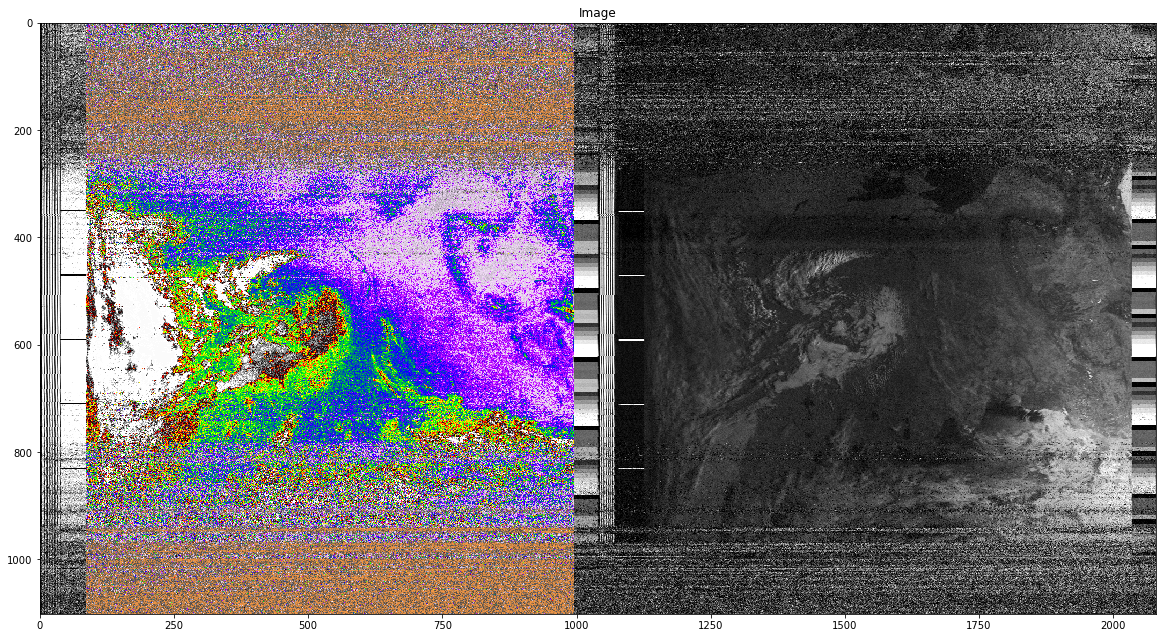

In [25]:
# Код

### Географическая привязка изображений

Географическая привязка означает, что внутренняя система координат снимка может быть связана с географической системой координат. Другими словами, географическая привязка означает связывание файла цифрового изображения с местоположениями в физическом пространстве. Этот термин обычно используется в области географических информационных систем для описания процесса связывания физической карты или растрового изображения карты с пространственными местоположениями.

Опорные точки используются вместе с преобразованием, чтобы сдвинуть набор растровых данных и изменить его геометрию в соответствии с географически верным местоположением. Соединение между опорной точкой набора растровых данных и соответствующей точкой уже выровненных данных называется парой опорных точек. Необходимое количество связей зависит от сложности преобразования, которое вы планируете использовать для привязки набора растровых данных. 

Зная лишь время приема сигнала со спутника, вы уже можете осуществить географическую привязку полученного изображения:

1. Так как спутник вам известен, вы можете найти его TLE.
2. Из TLE можно получить положение аппарата в моменты съемки.
3. Используя положения космического аппарата и параметры системы координат [WGS 84](https://ru.wikipedia.org/wiki/WGS_84) можно вычислить проекции первого и последнего положений съемки на Землю.
4. Для простейшей географической привязки достаточно связать центры первой и последней строки снимка с вычисленными проекциями.

Однако, для более точной привязки вам потребуется знать также некоторые параметры съемочной аппаратуры спутника, чтобы вы могли также произвести привязку не только центров строк снимков, но и, например, его углов.

**_Дальнейшая работа - в ArcGIS Pro_**

После того, как вы создали достаточное количество опорных точек, вы можете трансформировать набор растровых данных, так, чтобы он соответствовал координатам целевых данных. Чтобы добиться максимального совпадения координат для каждой ячейки, вы можете использовать несколько типов трансформации, таких как методом полиномов, сплайн, методом подгонки или подобия. 

Полином нулевого порядка будет использован для смещения ваших данных. Это часто используется в ситуации, когда ваши данные уже имеют пространственную привязку, но небольшой сдвиг лучше выровняет ваши данные. Для выполнения смещения ваших данных полиномом нулевого порядка необходима только одна опорная точка. 

Трансформирование методом полиномов первого порядка обычно используется для пространственной привязки изображения. Используйте трансформацию первого порядка (аффинную) для сдвига, масштабирования или поворота набора растровых данных. Это приводит к тому, что прямые линии исходного растра выглядят прямыми и в трансформированном наборе растровых данных. Ниже приведено уравнение для трансформации набора растровых данных, с использованием аффинного (первого порядка) полиномиального преобразования. Шесть параметров определяют трансформацию строк и столбцов растра в координаты карты.

<img src="https://pro.arcgis.com/ru/pro-app/latest/help/data/imagery/GUID-4AFFDC52-F9AB-41A1-A01D-658A657838BE-web.png" style="width: 450px;"/>

Чем выше порядок трансформации, тем более сложные искажения могут быть скорректированы. Однако трансформация выше третьего порядка используется очень редко. Трансформации высокого порядка требуют большее количество связей и, следовательно, больше времени на обработку. Как правило, если набор растровых данных необходимо растянуть, повернуть или изменить его размер, следует использовать трансформацию первого порядка. Для более сложного преобразования применяются трансформации второго или третьего порядка.

<img src="https://pro.arcgis.com/ru/pro-app/latest/help/data/imagery/GUID-7A915DDE-DF6C-4FEF-AC1B-C1AED1A1BACB-web.gif" style="width: 450px;"/>

**_Демонстрация привязки_**

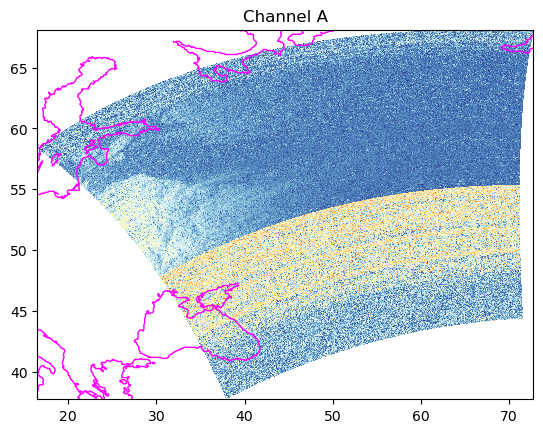

In [10]:
# Код

### Для выполнения следующей лабораторной работы потребуются:

1. Результаты первых двух лабораторных работ:
    * прогнозирование положения спутника, вычисление проекции положения на Землю
    * построение выровненного по синхроимпульсу изображения
2. Библиотеки `utm`, `pyproj` (`Proj`, `Transformer`)
2. Запись в файл (не обязательно)